### IMPORTING LIBRARIES AND DATA SET 

In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import pandas_profiling as pf
import matplotlib.pyplot as plt
df=pd.read_csv("./datasets/Dataset/penguins_lter.csv")
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

### OVERVIEW ABOUT THE DATASET BEFORE PREPROCESSING

In [44]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### GETTING RID OF UNECESSARY COLUMNS


In [45]:
df.drop('Comments',inplace=True,axis= 1)
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0    MALE                NaN                NaN  
1  FEMALE            8.94956          -24.69454  
2  FEMALE            8.36821          -25.33302  
3     NaN                NaN                NaN  
4  FEMALE            8.76651          -25.32426

### NULL VALUE REPLACEMENT FOR NUMERIC VARIABLES
#### NULL VALUE IS REPLACED BY THE MODE OF THE COLUMN


In [46]:
df['Culmen Length (mm)']=df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mode()[0])
df['Culmen Depth (mm)']=df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mode()[0])
df['Flipper Length (mm)']=df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mode()[0])
df['Body Mass (g)']=df['Body Mass (g)'].fillna(df['Body Mass (g)'].mode()[0])
df['Delta 15 N (o/oo)']=df['Delta 15 N (o/oo)'].fillna(0)
df['Delta 13 C (o/oo)']=df['Delta 13 C (o/oo)'].fillna(0)

# SINCE THE COLUMN SEX IS CATEGORICAL WE HAVE TO REPLACE THE NULL'S WITH THE MAXIMUM NUMBER OF OCCURANCES OF A GENDER
def ret_max_gender(x):
    male=0
    female=0
    for i in x:
        if i=='MALE':
            male=male+1
        elif i=='FEMALE':
            female=female+1
    if male>female:
        return "MALE"
    else:
        return "FEMALE"
df['Sex']=df['Sex'].fillna(ret_max_gender(df['Sex']))
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                41.1               17.0                190.0         3800.0   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0    MALE            0.00000            0.00000  
1  FEMALE            8.94956          -24.69454  
2  FEMALE            8.36821          -25.33302  
3    MALE            0.00000            0.00000  
4  FEMALE            8.76651          -25.32426

In [47]:
df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

### MANAGING CATEGORICAL VARIABLES

In [6]:
def int_float(x):
    for i in x:
        if i==0.0:
            i=0
        elif i==1.0:
            i=1
        else:
            i=0
def repl_gend(x):
    for i in x:
        if i==1.0:
            i="MALE"
        elif i==0.0:
            i="FEMALE"
            
df['Sex']=df['Sex'].map({'MALE':1,'FEMALE':0})
int_float(df['Sex'])
repl_gend(df['Sex'])
df['Date_Egg_Date']=df['Date Egg'].str.split('/').str[0]
df['Date_Egg_Month']=df['Date Egg'].str.split('/').str[1]
df['Date_Egg_Year']=df['Date Egg'].str.split('/').str[2]
df.drop('Date Egg',inplace=True,axis=1)
df['Date_Egg_Date']=df['Date_Egg_Date'].astype(int)
df['Date_Egg_Month']=df['Date_Egg_Month'].astype(int)
df['Date_Egg_Year']=df['Date_Egg_Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Culmen Length (mm)   342 non-null    float64
 9   Culmen Depth (mm)    342 non-null    float64
 10  Flipper Length (mm)  342 non-null    float64
 11  Body Mass (g)        342 non-null    float64
 12  Sex                  333 non-null    float64
 13  Delta 15 N (o/oo)    330 non-null    float64
 14  Delta 13 C (o/oo)    331 non-null    float64
 15  Comments             26 non-null     obj

### DRAWING INSIGHTS FROM DATA


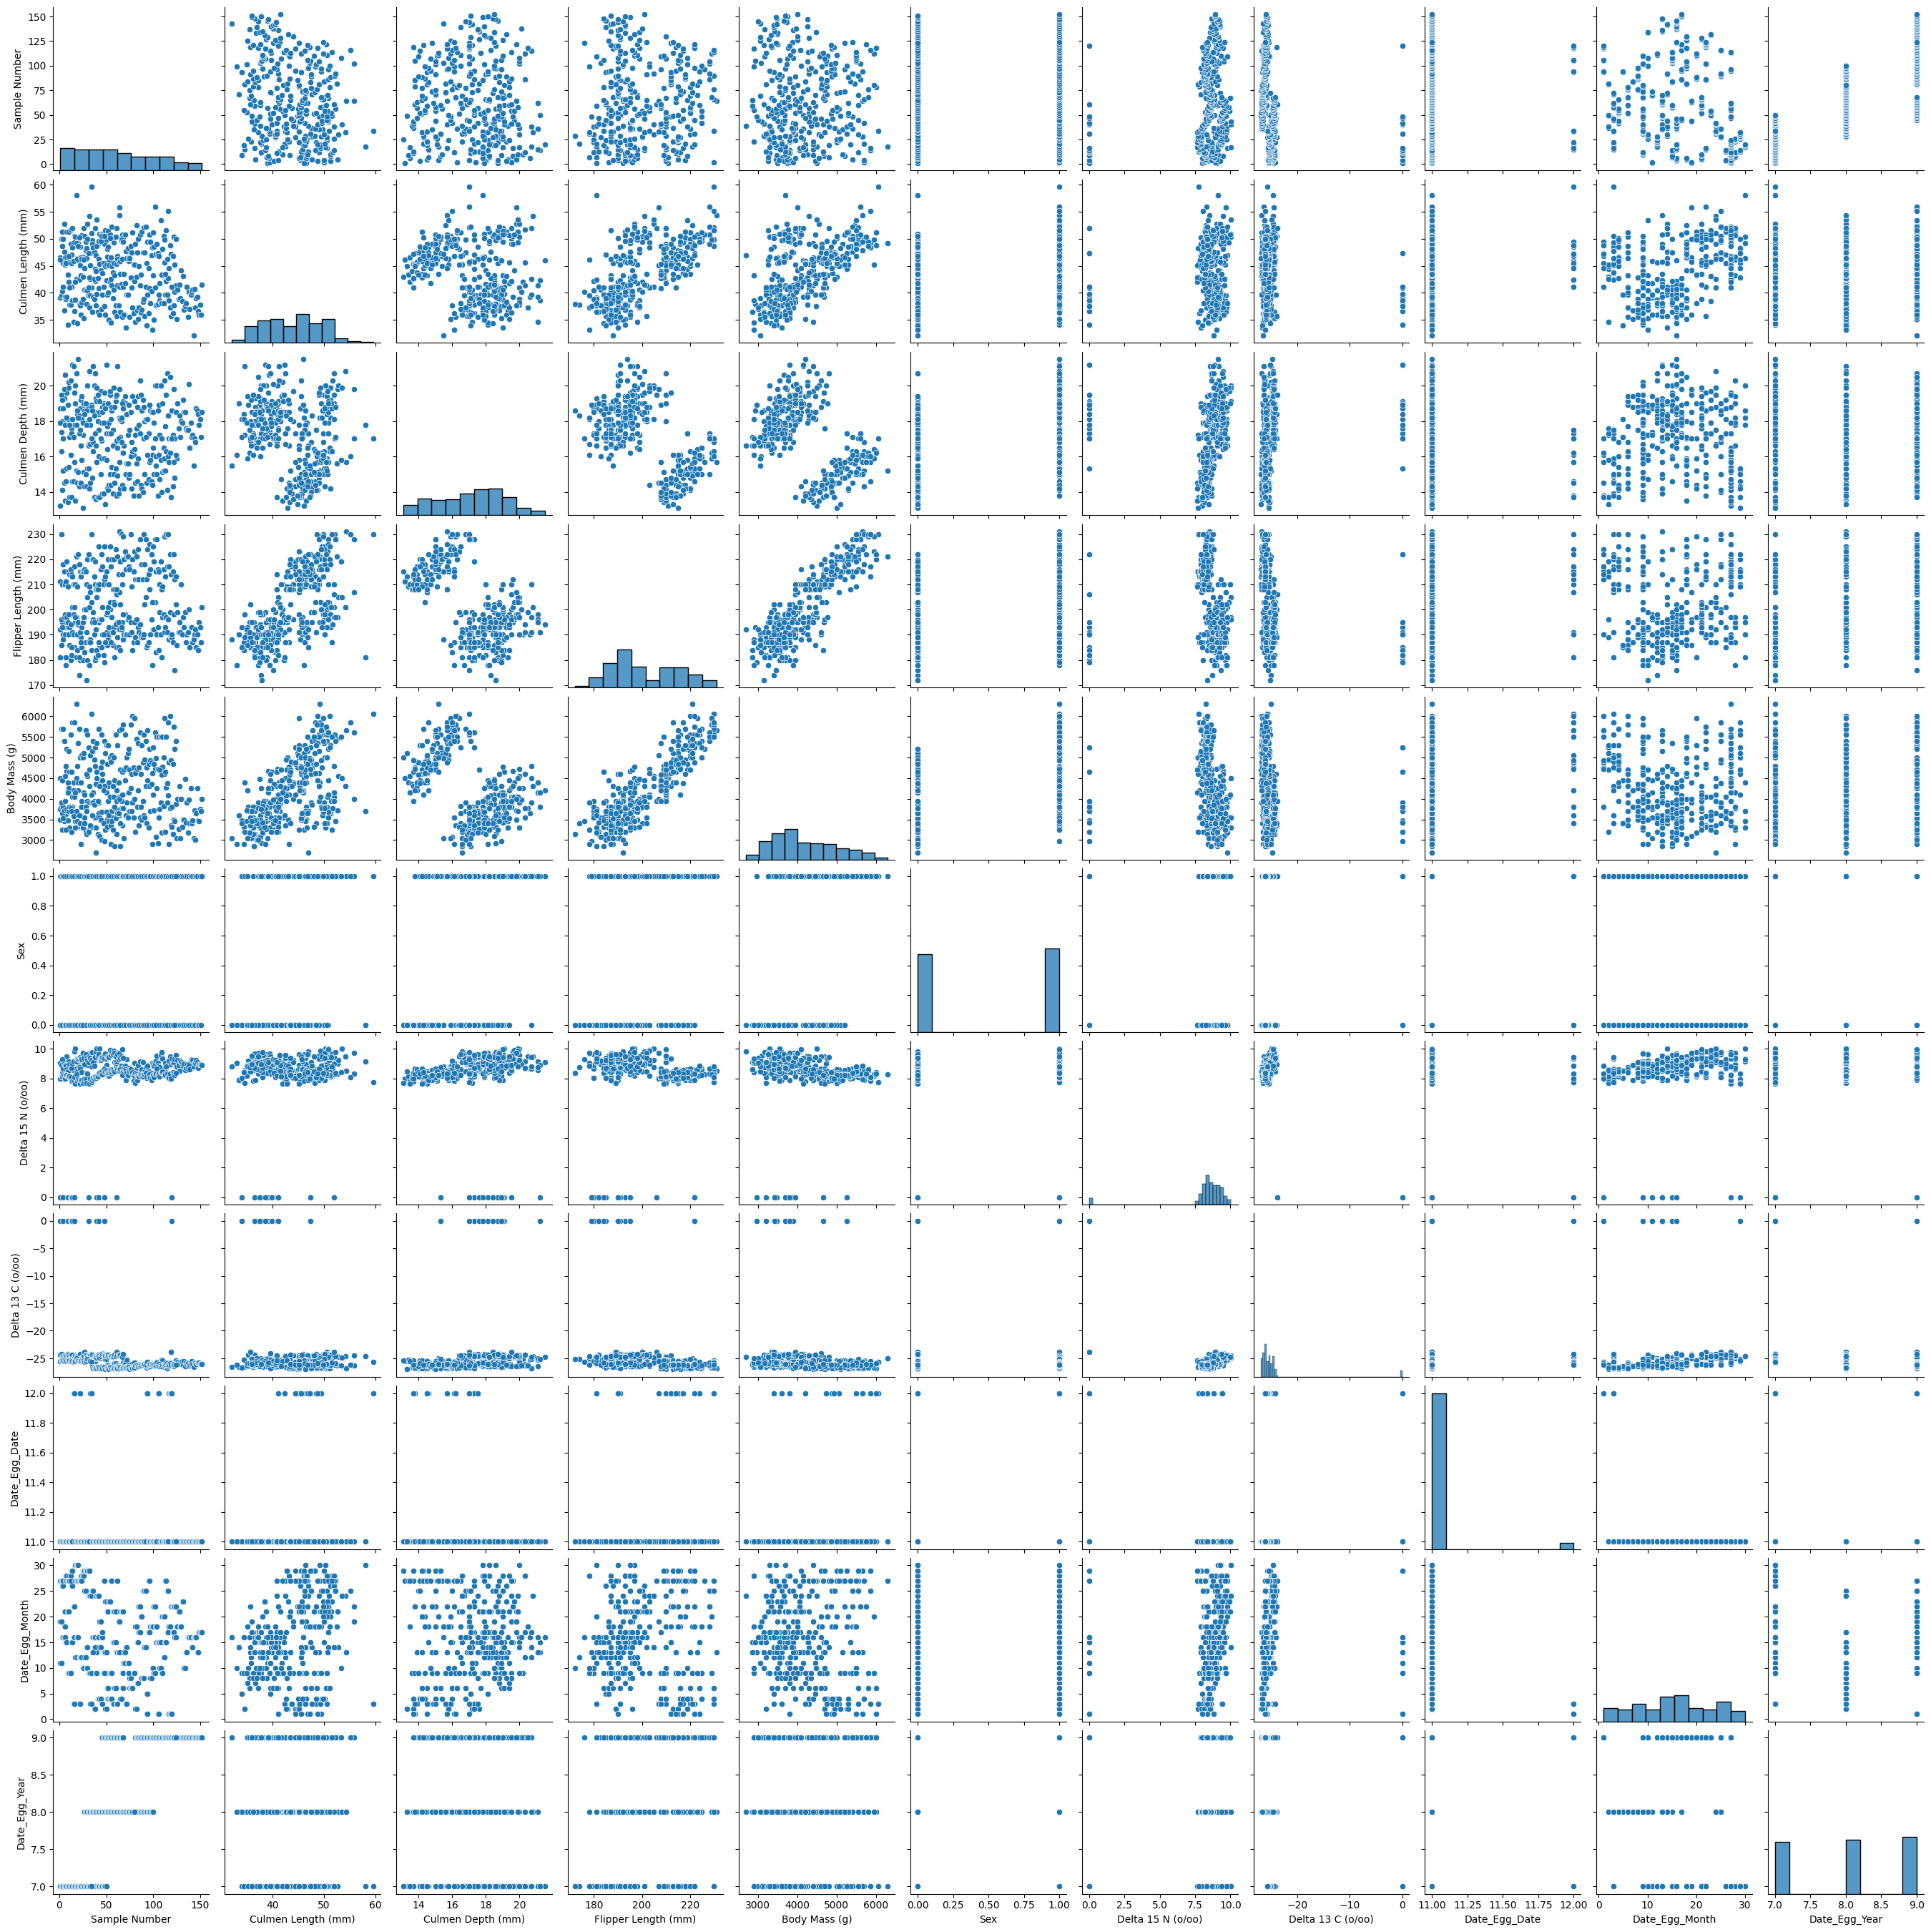

In [49]:
sns.pairplot(df)

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Island'>

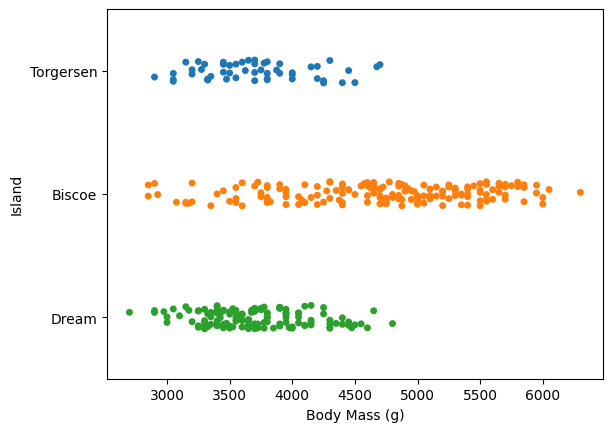

In [50]:
sns.stripplot(x='Body Mass (g)',y='Island',data=df)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Species'>

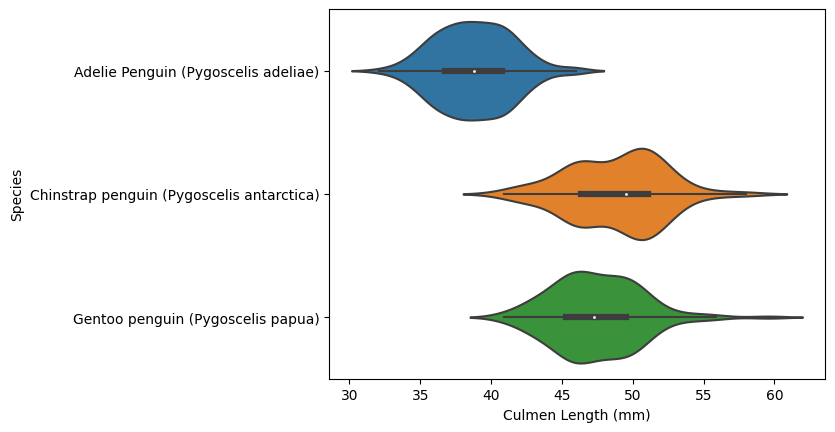

In [51]:
sns.violinplot(x=df['Culmen Length (mm)'],y=df['Species'])

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Species'>

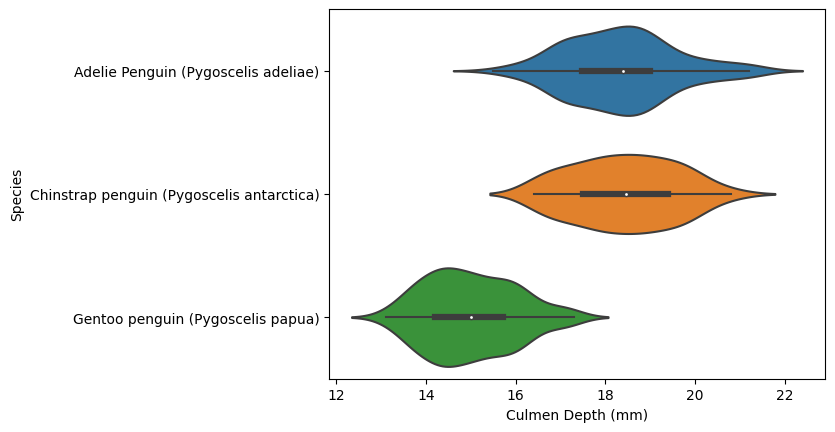

In [52]:
sns.violinplot(x=df['Culmen Depth (mm)'],y=df['Species'])

[Text(0.5, 1.0, 'Island VS Flipper Length')]

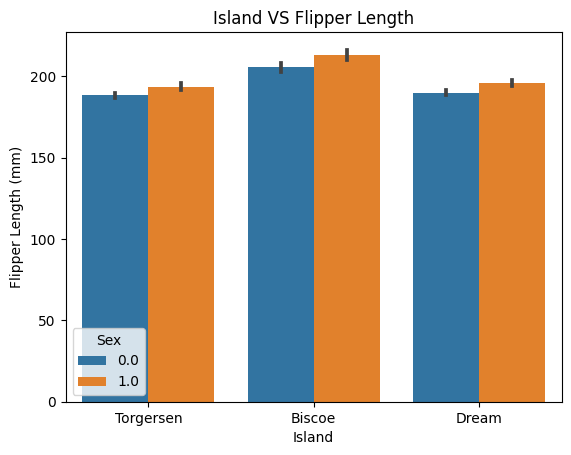

In [53]:
sns.barplot(x='Island',y='Flipper Length (mm)',hue='Sex',data=df).set(title='Island VS Flipper Length')
## 0.0 FOR FEMALE
## 1.0 FOR MALE

[Text(0.5, 1.0, 'Island VS Flipper Length')]

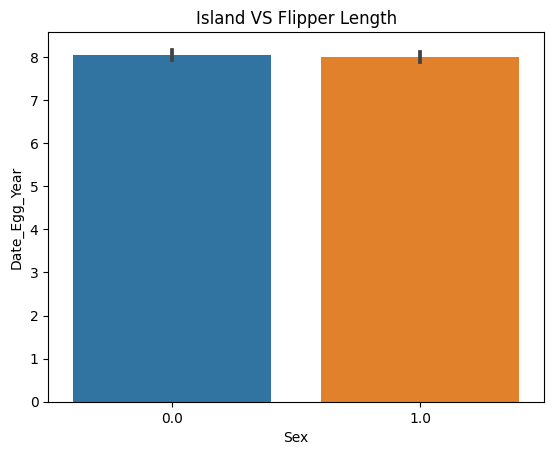

In [60]:

sns.barplot(x='Sex',y='Date_Egg_Year',data=df).set(title='Island VS Flipper Length')

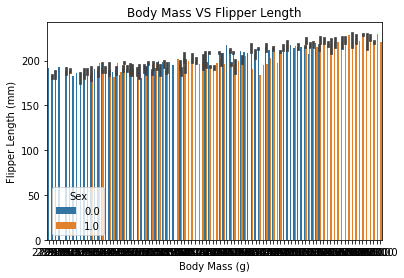

<Figure size 7200x7200 with 0 Axes>

In [14]:
fig=sns.barplot(x='Body Mass (g)',y='Flipper Length (mm)',hue='Sex',data=df).set(title='Body Mass VS Flipper Length')

<AxesSubplot:xlabel='Date_Egg_Year', ylabel='Island'>

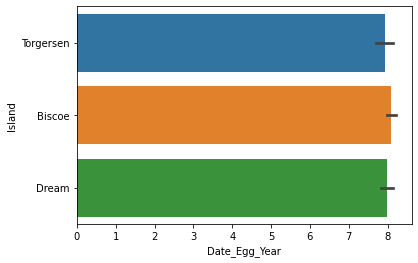

In [17]:
sns.barplot(x='Date_Egg_Year',y='Island',data=df)

<AxesSubplot:xlabel='Species', ylabel='Island'>

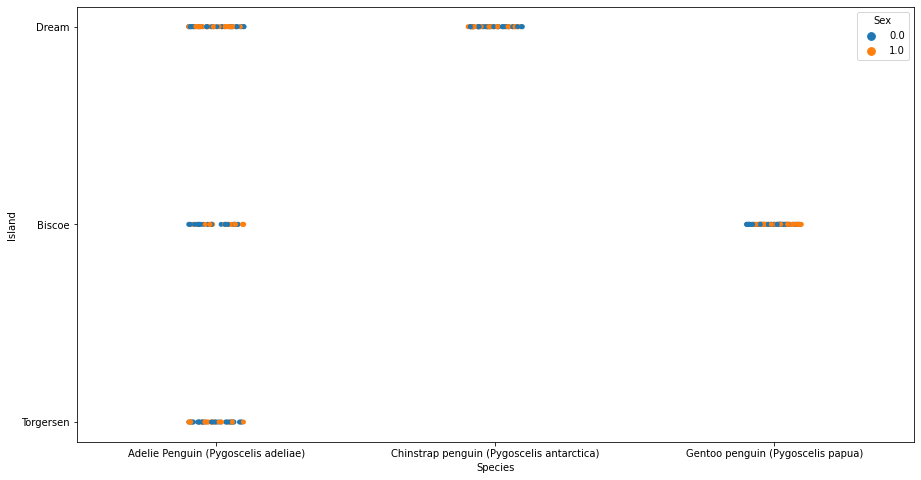

In [35]:
plt.figure(figsize=(15,8))
sns.stripplot(x='Species',y='Island',hue='Sex',data=df)

## INSIGHTS FROM THE PREPROCESSED VIUALIZED DATA

## 1. Among all the Island Penguin's Biscoe Penguin's have the most Body Mass.
## 2. Out of all penguin species Gentoo penguin (Pygoscelis papua) has the biggest Culmen Length.
## 3. Out of all penguin species Adelie Penguin (Pygoscelis adeliae) has the deepest Culmen.
## 4. Penguins with higher body mass has the longest Flipper length.
## 5. Biscoe has more Penguin population over the years.
## 6. Dream Island has only Chinstrap penguin species. 
## 7. Biscoe Island has only Gentoo penguin species.
## 8. Adelie penguin is present in each and every Island.